In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import networkx as nx           # pip install networkx
import pandas as pd
from collections import Counter
from netwulf import visualize   # pip install netwulf
from operator import itemgetter

*"The BA model is an algorithm for generating random scale-free networks using a preferential attachment mechanism"* [(Wikipedia)](https://en.wikipedia.org/wiki/Barab%C3%A1si%E2%80%93Albert_model).

i.e. the BA distribution follows a power law such that nodes that are already hubs have higher probability of having new nodes attached.

In [331]:
class ba_model(object):
    ''' Creates a Barabási–Albert (BA) network.
        Optional: Set the size N and number of new edges from each new node m.
                  as well as the color and node size
    '''

    def __init__(self, N=30, m=1, seed=None, color='g'):
        self.N = N # number of nodes
        self.m = m # number of random edges to add for each new node
        self.seed = seed # seed number
        self.c = color
        self.s = 100 # node size
        self.G = nx.barabasi_albert_graph(self.N, self.m, self.seed)

    def definer(self):
        """ define hubs, spokes and focus cities relative to mean degree
            return node and degree
        """ 
        node_and_degree = self.G.degree()
        # sorted array of nodes and degrees
        s = np.array(sorted(node_and_degree, reverse = True, key=itemgetter(1)))
        hub = s[:,1] > 2*s[:,1].mean() # being above two times mean degree
        spoke = s[:,1] <= s[:,1].mean() # being at or below mean degree
        focus = np.logical_not(hub) & np.logical_not(spoke) # in between
        hubs_array, spokes_array, focus_array = s[hub], s[spoke], s[focus]
        return hubs_array, spokes_array, focus_array

    def nodes(self):
        """ return list of nodes for hubs, spokes and focus cities respectively
        """
        hubs_array, spokes_array, focus_array = self.definer()
        hubs, spokes, focus = hubs_array[:,0].tolist(), spokes_array[:,0].tolist(), focus_array[:,0].tolist()
        return hubs, spokes, focus

    def draw(self):
        """ draw the network randomly
        """
        plt.subplots(figsize = (10, 8))
        # list of nodes being hubs, spokes and focus cities respectively
        hubs, spokes, focus = self.nodes()
        # Draw graph
        pos = nx.spring_layout(self.G)
        nx.draw(self.G, pos, node_color=self.c, node_size=self.s, with_labels=False)
        # Draw hubs as large and red, focus cities as medium and blue
        nx.draw_networkx_nodes(self.G, pos, nodelist=hubs, node_size=300, node_color='r')
        nx.draw_networkx_nodes(self.G, pos, nodelist=focus, node_size=200, node_color='b')
        plt.show()

    def shell(self):
        """ draw the network with hubs in the middle
        """
        plt.subplots(figsize = (12, 10))
        # list of nodes being hubs, spokes and focus cities respectively
        hubs, spokes, focus = self.nodes()
        # Draw graph
        pos = nx.shell_layout(self.G, nlist=[hubs+focus, spokes])
        nx.draw(self.G, pos, node_color=self.c, node_size=self.s, with_labels=False)
        # Draw hubs as large and red, focus cities as medium and blue
        nx.draw_networkx_nodes(self.G, pos, nodelist=hubs, node_size=300, node_color='r')
        nx.draw_networkx_nodes(self.G, pos, nodelist=focus, node_size=200, node_color='b')
        plt.show()

    def hubs(self):
        # list of hubs
        hubs_all, spokes_all, focus_all = self.nodes()
        # number of hubs
        n = min(5,len(hubs_all))  # number of hubs: maximum 5, showing the largest hubs first
        # creating figure with subplots showing each hub
        fig, ax = plt.subplots(1, n, figsize=(12, 12/n), sharey=True)
        # Create ego graph for each hub
        for i in range(n):
            hub_ego = nx.ego_graph(self.G, hubs_all[i])
            neighbors = nx.all_neighbors(hub_ego, hubs_all[i])
            hubs = list(set(hubs_all).intersection(neighbors))
            focus = list(set(focus_all).intersection(neighbors))
            # Draw graph
            pos = nx.spring_layout(hub_ego)
            nx.draw(hub_ego, pos, node_color=self.c, node_size=self.s, with_labels=False, ax=ax[i])
            # Draw hubs as large and red, focus cities as medium and blue
            nx.draw_networkx_nodes(hub_ego, pos, nodelist=[hubs_all[i]], node_size=300, node_color='r', ax=ax[i])
            nx.draw_networkx_nodes(hub_ego, pos, nodelist=hubs, node_size=300, node_color='r', ax=ax[i])
            nx.draw_networkx_nodes(hub_ego, pos, nodelist=focus, node_size=200, node_color='b', ax=ax[i])
        plt.show()

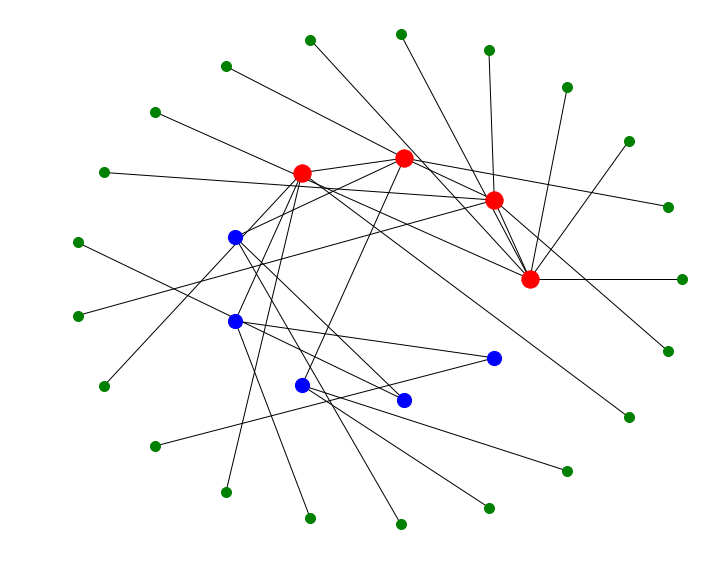

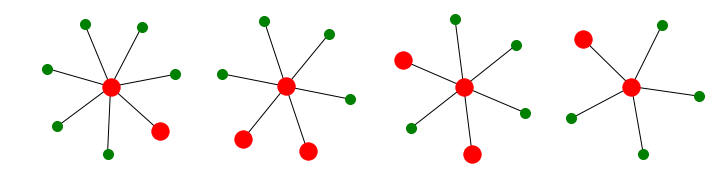

In [332]:
# Graphs
ba = ba_model(N=30, m=1, seed=911)
hubs, spokes, focus = ba.nodes()
# ba.draw()
ba.shell()
ego = ba.hubs()